# EPNet data analysis 

In [19]:
# Notebook prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
from plotly.graph_objs import *

In [30]:
import plotly
plotly.tools.set_credentials_file(username='izoken@gmail.com', api_key='846eKsoMLxYnGL0VlnIL')

In [6]:
# read data
df = pd.read_excel('StraussShipwrecks.xlsx') 
df.columns

Index(['Wreck ID', 'Strauss ID', 'Name', 'Parker Number', 'Sea area',
       'Country', 'Region', 'Latitude', 'Longitude', 'Min depth', 'Max depth',
       'Depth', 'Period', 'Dating', 'Earliest date', 'Latest date',
       'Date range', 'Mid point of date range', 'Probability',
       'Place of origin', 'Place of destination', 'Reference', 'Comments',
       'Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks',
       'Marble type', 'Other cargo', 'Hull remains', 'Shipboard paraphernalia',
       'Ship equipment', 'Estimated tonnage', 'Amphora type'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

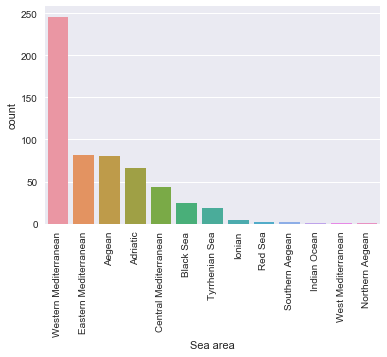

In [20]:
sns.countplot(x = 'Sea area', order = df['Sea area'].value_counts().index, data = df)
plt.xticks (rotation = 90)

In [42]:
# remove shipwrecks withot coordinates
df_map = df[df.Latitude != 0]

In [40]:
site_lat = df_map.Latitude
site_lon = df_map.Longitude
locations_name = df.Name

In [41]:
mapbox_access_token = "pk.eyJ1IjoiaXphcm9tYW5vd3NrYSIsImEiOiJjamRuNTdodTMwYWdmMnhtazduNWJwYngxIn0.mqQY0gpKdO3M8ciTuRioQg"
data = Data([
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    )]
)
        
layout = Layout(
    title='Roman Shipwrecks',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=10
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Roman Shipwrecks')

In [46]:
df.columns


Index(['Wreck ID', 'Strauss ID', 'Name', 'Parker Number', 'Sea area',
       'Country', 'Region', 'Latitude', 'Longitude', 'Min depth', 'Max depth',
       'Depth', 'Period', 'Dating', 'Earliest date', 'Latest date',
       'Date range', 'Mid point of date range', 'Probability',
       'Place of origin', 'Place of destination', 'Reference', 'Comments',
       'Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks',
       'Marble type', 'Other cargo', 'Hull remains', 'Shipboard paraphernalia',
       'Ship equipment', 'Estimated tonnage', 'Amphora type'],
      dtype='object')

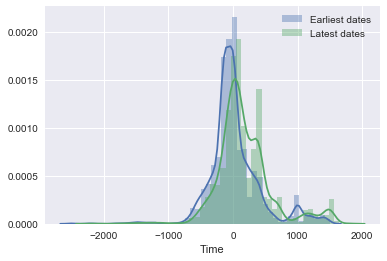

In [50]:
sns.distplot(df['Earliest date'].dropna(), label = 'Earliest dates')
sns.distplot(df['Latest date'].dropna(), label = 'Latest dates')
plt.legend()
plt.xlabel('Time')